In [ ]:
#Importing libraries and mounting drive
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mping
from google.colab.patches import cv2_imshow
import math
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Images
image = cv2.imread('/content/drive/MyDrive/Finland-Car-Sales-Data-585x585.jpg')
img = cv2.imread('/content/drive/MyDrive/Finland-Car-Sales-Data-585x585.jpg')

In [ ]:
#Canny-Edge detector
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img,(5,5),0)
img = cv2.Canny(img,50,150)

In [ ]:
#seperating lanes
def seperate_lanes(image,a,b,c,d):
  height, width = image.shape
  triangle = np.array([
                        [(math.floor(a), math.floor(height*b)), (math.floor(width*0.5), math.floor(height*0.5)), (math.floor(c),math.floor(height*d))]
                      ])
    
  mask = np.zeros_like(image)
  mask = cv2.fillPoly(mask, triangle, 255)
  mask = cv2.bitwise_and(img, mask)
  return mask

height, width = img.shape
mask_left = seperate_lanes(img,0,0.6,0.5,0.9)
mask_middle = seperate_lanes(img,width,0.6,width,0.9)
mask_right = seperate_lanes(img,0,0.9,width,0.9)

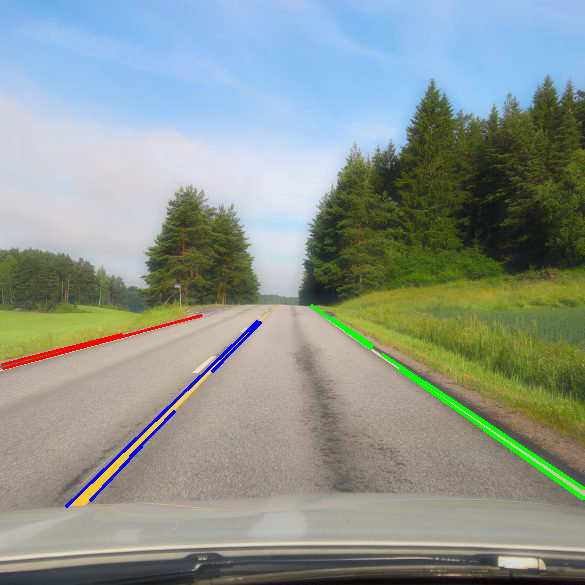

In [ ]:
#putting lanes on original image
def detect_lane(image,mask,color):
  lines = cv2.HoughLinesP(mask, rho=2, theta=np.pi/180, threshold=100, minLineLength=40, maxLineGap=5)
  image = np.copy(image)
  for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(image, (x1, y1), (x2, y2), color, thickness = 2)
  return image

green = [255,0,0]
blue = [0,255,0]
red = [0,0,255]

lane = detect_lane(detect_lane(detect_lane(image,mask_left,red),mask_middle,blue),mask_right,green)

cv2_imshow(lane)

In [ ]:
#print current lane
lines_middle = cv2.HoughLinesP(mask_middle, rho=2, theta=np.pi/180, threshold=100, minLineLength=40, maxLineGap=5)

for line in lines_middle:
  for x1, y1, x2, y2 in line:
    if ( (y1-y2) * (x1-x2) > 0 ):
      print("Right lane")
    elif ( (y1-y2) * (x1-x2) < 0):
      print("Left lane")
    else:
      print("Middle of the road")

Right lane
Right lane
Right lane
Right lane
Right lane
Right lane
